In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

from sklearn.decomposition import PCA

In [72]:
#loading datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [73]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [74]:
data['Days_Since_Signup'] = (pd.to_datetime('today') - pd.to_datetime(data['SignupDate'])).dt.days
customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total money spent by the customer
    'TransactionID': 'count',  # Number of transactions per customer
    'Days_Since_Signup': 'mean'  # Average number of days since signup
}).rename(columns={'TotalValue': 'Total_Spent', 'TransactionID': 'Transaction_Frequency'})


In [75]:
#Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary)

In [76]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

c:\Users\BALKR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [77]:
#Evaluate Clustering - Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')  

Davies-Bouldin Index: 0.8821991487279204


In [78]:
# Reducing the dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
customer_summary['PCA1'] = pca_result[:, 0]
customer_summary['PCA2'] = pca_result[:, 1]

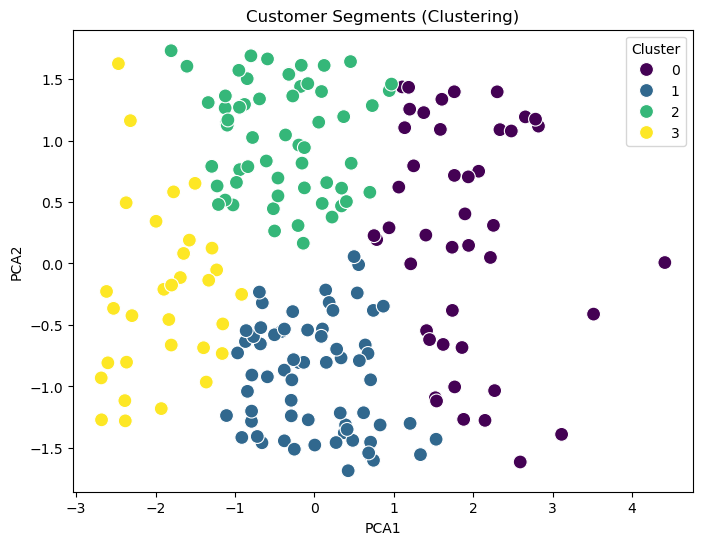

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_summary, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments (Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [80]:
# Summary of Clusters
cluster_summary = customer_summary.groupby('Cluster').agg({
    'Total_Spent': 'mean',  # Average money spent per cluster
    'Transaction_Frequency': 'mean',  # Average transactions per cluster
    'Days_Since_Signup': 'mean'  # Average days since signup per cluster
}).reset_index()

In [81]:
print(cluster_summary)  

   Cluster  Total_Spent  Transaction_Frequency  Days_Since_Signup
0        0  5905.710000               7.818182         686.840909
1        1  3548.877879               5.227273         257.924242
2        2  2804.902586               4.241379         877.689655
3        3  1072.065484               2.096774         416.741935
